In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import pandas as pd
import os

In [2]:
april19 = pd.read_csv('Sales_Data/Sales_April_2019.csv')

april19.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Merge 12 Months data in single csv file**

In [3]:
files = [files for files in os.listdir('Sales_Data/') if files.endswith('.csv')] 

for f in files:
    print(f)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [4]:
# concatenate all
all_data1 = pd.DataFrame()  # Created an empty dataframe

for f in files:
    print(f)
    data=pd.read_csv('Sales_Data/' + f)
    all_data1 = pd.concat([all_data1, data])

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [5]:
# Method 2
all_data = pd.DataFrame()

files = [f for f in os.listdir('Sales_Data/') if f.endswith('.csv')]

print([f for f in files])

all_data = pd.concat(pd.read_csv('Sales_Data/' + f) for f in files)
all_data.head()

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
all_data.to_csv('all_data.csv', index=False)

### Task 1

### Add Month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]

# The month column has 04, 01, 07 months instead of 4, 1, 7
# all_data['Month'] = all_data['Month'].astype('int32')

# We have to clean our data

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


### Task 2
## Cleaning of Data 

### 1. Drop NaN

In [8]:
nan_data = all_data[all_data.isna().any(axis=1)]
#print(nan_data)

all_data = all_data.dropna(how='all')

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


### 2. Remove 'OR'

In [9]:
#all_data['Month'] = all_data['Month'].astype('int32')
# We have this error

# invalid literal for int() with base 10: 'Or'

# because - we are copying 2 char from order date and putting it in Month column

## Find 'OR' and Delete it

# find where it is happning??
all_data[all_data['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10784,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
#all_data['Month'] = all_data['Order Date'].str[0:2]

all_data = all_data[all_data['Month'] != 'Or']

#all_data = all_data[~all_data['Order Date'].isin(['Order Date'])]

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


### Now we can go for  '.astype('int32')'

In [11]:
warnings.filterwarnings("ignore")
all_data['Month'] = all_data['Month'].astype('int32')
all_data.to_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


### Convert from String --> Numeric

In [12]:

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Task 3
### Add Sales Column

In [13]:
# all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

## all_data['Quantity Ordered'] ==> is a string

# Therefore, convert it from string to number MORE CLEANING  --> See above

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [14]:
all_data.to_csv('all_data.csv')

### Q1. What was the best month for Sales and how much did we earned?

In [15]:
monthly_sales = all_data.groupby('Month').sum()

max_sale = monthly_sales[monthly_sales['Sales']==monthly_sales['Sales'].max()]
print(max_sale)

#print('Best Month is {} with Maximum sales of {.4f}'.format(month, sale))

       Quantity Ordered    Price Each         Sales
Month                                              
12                28114  4.588415e+06  4.613443e+06


Text(0.5, 0, 'month number')

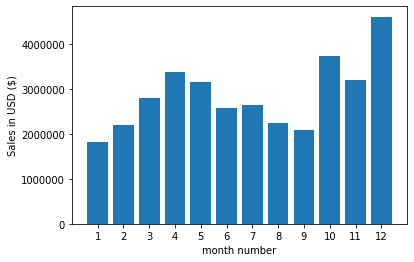

In [16]:
# ## PLot the data
months = range(1,13)
plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('month number')    # try for converting numbers into month name

# Q2. what city had the highest number of Sales

### Task 4 -> to add the City and State column --> .apply()

In [17]:
data = pd.read_csv('all_data.csv')
data1 = pd.read_csv('all_data.csv')

In [18]:
#Method 1

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.head(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,295665,Macbook Pro Laptop,1,1700.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY)
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY)


In [19]:
# Method 2
data1['City'] = data1['Purchase Address'].apply(lambda x:x.split(',')[1])
data1.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City


In [20]:
# for state:
data1['State'] = data1['Purchase Address'].apply(lambda x: f"{(x.split(',')[2].split(' ')[1])}")
data1.head(3)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY


### Find city with highest sale

In [21]:

sale_city1 = data1.groupby(['State','City']).sum()
print(sale_city1)

print('*****************************************')
sale_city = data.groupby(['City']).sum()
sale_city

                      Unnamed: 0     Order ID  Quantity Ordered    Price Each  \
State City                                                                      
CA     Los Angeles     247743297   6811084693             33289  5.421435e+06   
       San Francisco   372569180  10304443952             50239  8.211462e+06   
GA     Atlanta         122928154   3423838407             16602  2.779908e+06   
MA     Boston          165758780   4598265261             22528  3.637410e+06   
ME     Portland         20641344    563266345              2750  4.471893e+05   
NY     New York City   208439450   5736333884             27932  4.635371e+06   
OR     Portland         83402354   2305594747             11303  1.860558e+06   
TX     Austin           82709457   2280982185             11153  1.809874e+06   
       Dallas          124308328   3415643578             16730  2.752628e+06   
WA     Seattle         122394893   3406693974             16553  2.733296e+06   

                       Mont

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,,
Atlanta (GA),122928154,3423838407,16602,2.779908e+06,104794,2.795499e+06
Austin (TX),82709457,2280982185,11153,1.809874e+06,69829,1.819582e+06
Boston (MA),165758780,4598265261,22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),124308328,3415643578,16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),247743297,6811084693,33289,5.421435e+06,208325,5.452571e+06
New York City (NY),208439450,5736333884,27932,4.635371e+06,175741,4.664317e+06
Portland (ME),20641344,563266345,2750,4.471893e+05,17144,4.497583e+05
Portland (OR),83402354,2305594747,11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),372569180,10304443952,50239,8.211462e+06,315520,8.262204e+06


In [22]:
# The Month column does not make any sense => thus droping it
sale_city.drop(columns='Month', inplace=True)

max_sale_city = sale_city[sale_city['Sales']==sale_city['Sales'].max()]
max_sale_city

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Sales
City,,,,,
San Francisco (CA),372569180,10304443952,50239,8.211462e+06,8.262204e+06


In [23]:
# Store the data
data.to_csv('all_data.csv', index=False)

Text(0.5, 0, 'month number')

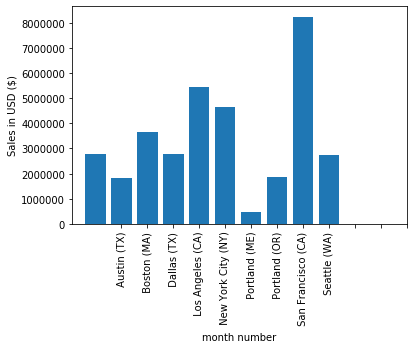

In [24]:
# Plot the data

data.sort_values('City',inplace=True, ascending=True) # the data['City'] has to be sorted
cities = data['City'].unique()

plt.bar(cities, sale_city['Sales'])
plt.xticks(months, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('month number')    # try for converting numbers into month nameb

185950

# Q3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [25]:
# Load the data

data = pd.read_csv('all_data.csv')

data.head(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,295665,Macbook Pro Laptop,1,1700.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY)
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY)


In [26]:
# convert the data into day time format so that we can determine the optimum time
%time

data['Order Date'] = pd.to_datetime(data['Order Date'])
data.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [27]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [28]:
data.sort_values('Hour',inplace=True, ascending=True) 
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
166793,8748,231266,Wired Headphones,1,11.99,2019-07-26 00:24:00,"947 Church St, Dallas, TX 75001",7,11.99,Dallas (TX),0,24
106144,7251,285731,AAA Batteries (4-pack),4,2.99,2019-12-01 00:02:00,"786 Hill St, San Francisco, CA 94016",12,11.96,San Francisco (CA),0,2
142838,6072,147012,Vareebadd Phone,1,400.00,2019-01-23 00:48:00,"975 Lakeview St, San Francisco, CA 94016",1,400.00,San Francisco (CA),0,48
68739,13540,174937,iPhone,1,700.00,2019-03-23 00:26:00,"284 14th St, Austin, TX 73301",3,700.00,Austin (TX),0,26


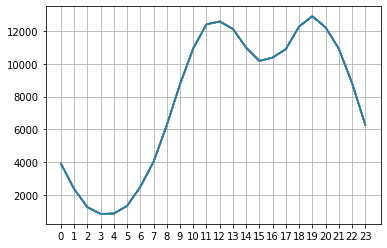

In [29]:
hours = data['Hour'].unique()

#plt.figure(figsize=(7,7))
plt.plot(hours, data.groupby('Hour').count()) # counted the number of rows w.r.t Hours
plt.xticks(hours)
plt.grid()

# Q4. Which products are often sold 'Together'

In [30]:
comb_order = data[data['Order ID'].duplicated(keep=False)]  # to output only the duplicated data

comb_order['Grouped'] = comb_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

comb_order = comb_order[['Order ID', 'Grouped']].drop_duplicates()
comb_order

,Order ID,Grouped
106198,285783,"Macbook Pro Laptop,USB-C Charging Cable"
142277,146472,"Vareebadd Phone,USB-C Charging Cable"
106967,286523,"Bose SoundSport Headphones,Vareebadd Phone"
142098,146299,"USB-C Charging Cable,Wired Headphones"
178938,216179,"20in Monitor,Wired Headphones"
...,...,...
49925,156881,"iPhone,Lightning Charging Cable"
164367,228939,"Vareebadd Phone,Bose SoundSport Headphones"
50163,157102,"Google Phone,USB-C Charging Cable"
128265,270629,"USB-C Charging Cable,Google Phone"


In [31]:
data.groupby('Order ID').sum() #(lambda x: ','.join())

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Order ID,,,,,,,
141234,0,1,700.00,1,700.00,21,25
141235,1,1,14.95,1,14.95,14,15
141236,2,2,11.99,1,23.98,13,33
141237,3,1,149.99,1,149.99,20,33
141238,4,1,11.99,1,11.99,11,59
...,...,...,...,...,...,...,...
319666,25112,1,14.95,12,14.95,20,58
319667,25113,2,3.84,12,7.68,12,1
319668,25114,1,400.00,12,400.00,6,43
